# Práctica 3: limpieza de datos

## Dataframe 3: netflix-shows

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None #silence

### Exploración de datos

In [4]:
df = pd.read_csv('C:/Users/HP/Downloads/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
print(df.shape)
print(df.dtypes)

(6234, 12)
show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


Selección de columnas numéricas

In [5]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['show_id' 'release_year']


Selección de columnas no numéricas

In [6]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['type' 'title' 'director' 'cast' 'country' 'date_added' 'rating'
 'duration' 'listed_in' 'description']


El dataset tiene 6234 registros y 12 atributos, de los cuales 2 son numéricas y 10 son no numéricas.

### Datos Faltantes 

#### Técnica #1: mapa de calor de los datos faltantes 

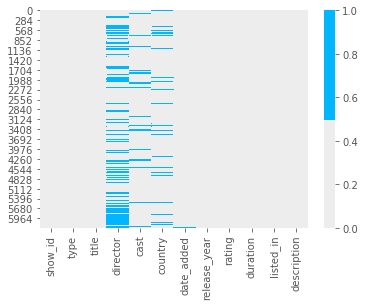

In [7]:
cols = df.columns[:12] 
colours = ['#EEEDED', '#00B6FF'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

En la parte azul es donde están los faltantes

#### Técnica #2: Lista de porcentaje de datos faltantes¶ 

In [8]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if (pct_missing > 0):
        #print(pct_missing)
        print('{} - {}%'.format(col, round(pct_missing*100)))

director - 32.0%
cast - 9.0%
country - 8.0%
date_added - 0.0%
rating - 0.0%


El dataframe tiene 5 columnas con missings, el porcentaje mayor es de 32% y hay dos que tienden a 0 por eso no se alcanzan casi a percibir.

#### Técnica #3: Histograma de datos faltantes

created missing indicator for: director
created missing indicator for: cast
created missing indicator for: country
created missing indicator for: date_added
created missing indicator for: rating


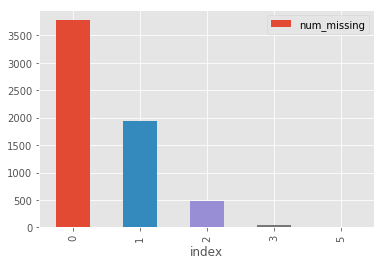

In [9]:
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        

ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

La columna director es la que tiene más faltantes

### ¿Qué hacer? 

#### Técnica #1: Histograma y Box Plot

Histograma de release_year

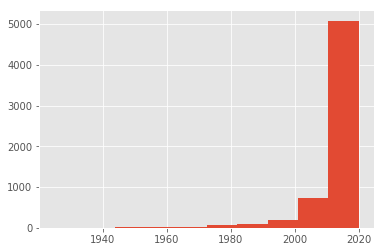

In [5]:
df['release_year'].hist()

la distrución de release_year está cargada a los últimos años

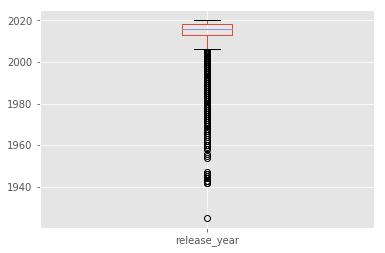

In [6]:
df.boxplot(column=['release_year'])

Probablemente haya un outlier pues se ve un dato solito antes de 1940.

#### Técnica #2: Estadística descriptiva

In [12]:
df['release_year'].describe()

count    6234.00000
mean     2013.35932
std         8.81162
min      1925.00000
25%      2013.00000
50%      2016.00000
75%      2018.00000
max      2020.00000
Name: release_year, dtype: float64

la estadística descriptiva indica que 1925 es el outlier que habíamos visto en el boxplot.

#### Técnica #3: Gráfico de barras

Esta técnica funciona para variables categóricas, por lo que usaremos la variable type

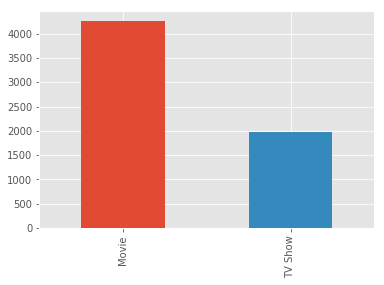

In [9]:
df['type'].value_counts().plot.bar()

### Datos innecesarios

¿Cómo descubrir datos innecesarios?

#### Tipo innecesario #1: Desinformativo / Repetitivo


Filas con con más del 95% de filas que tienen el mismo valor.

In [17]:
num_rows = len(df.index)
low_information_cols = [] 

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

No hay columnas repetitivas

#### Tipo innecesario #2: Irrelevante

#### Tipo innecesario #3: Duplicados

######                       Duplicados tipo #1: todas las características

In [18]:
df_dedupped = df.drop('show_id', axis=1).drop_duplicates()


print(df.shape)
print(df_dedupped.shape)

(6234, 12)
(6233, 11)


#### Duplicados tipo #2: características claves

Tomamos las primeras 5 características de los registros como clave

In [21]:
key = ['type', 'title', 'director', 'country']

df.fillna(-999).groupby(key)['show_id'].count().sort_values(ascending=False).head(20)

type     title                     director            country                
TV Show  Charmed                   -999                United States              2
Movie    The Silence               Gajendra Ahire      India                      2
         Frank and Cindy           G.J. Echternkamp    United States              2
TV Show  Kakegurui                 -999                Japan                      2
Movie    Sarkar                    A.R. Murugadoss     India                      2
TV Show  Top Boy                   -999                United Kingdom             2
Movie    Love You... Love You Not  Sridhar Jetty       Indonesia                  1
         Love and Shukla           Jatla Siddartha     India                      1
         Love for Sale             Andibachtiar Yusuf  Indonesia                  1
         Love on Delivery          Stephen Chow        Hong Kong                  1
         Love, Rosie               Christian Ditter    Germany, United Kingdom   

In [22]:
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

(6234, 12)
(6228, 12)


No hubo ninguna columna duplicada por características clave

### Datos inconsistentes

#### Tipo inconsistente #1: Capitalización

In [24]:
df['title'].value_counts(dropna=False)

Tunnel                                                      3
Limitless                                                   3
Oh My Ghost                                                 3
Love                                                        3
The Silence                                                 3
Hostages                                                    2
Kakegurui                                                   2
We Are Family                                               2
Supergirl                                                   2
Lovesick                                                    2
Shadow                                                      2
The In-Laws                                                 2
Zoo                                                         2
The Outsider                                                2
Bleach                                                      2
Godzilla                                                    2
Love O2O

In [25]:
df['title_upper'] = df['title'].str.upper()
df['title_upper'].value_counts(dropna=False)

LOVE                                           3
OH MY GHOST                                    3
TUNNEL                                         3
LIMITLESS                                      3
THE SILENCE                                    3
PRINCE                                         2
THE GIFT                                       2
MANIAC                                         2
LIFE                                           2
THE IN-LAWS                                    2
BENJI                                          2
FULLMETAL ALCHEMIST                            2
MANHUNT                                        2
TIGER                                          2
DRIVE                                          2
SKINS                                          2
LAVENDER                                       2
ZOOM                                           2
THE LOVERS                                     2
SUPERGIRL                                      2
SOLO                

#### Tipo inconsistente #2: Formatos

In [26]:
df.date_added.value_counts()

January 1, 2020       122
November 1, 2019       94
March 1, 2018          78
December 31, 2019      74
October 1, 2018        72
October 1, 2019        71
July 1, 2019           60
November 1, 2018       59
January 1, 2018        54
April 1, 2018          47
October 1, 2017        46
September 1, 2017      44
May 1, 2017            44
May 1, 2018            43
February 1, 2019       42
July 1, 2018           40
January 1, 2019        38
August 1, 2018         38
March 10, 2017         37
July 1, 2017           35
November 20, 2019      35
August 1, 2017         35
September 1, 2019      34
August 1, 2019         31
March 1, 2019          31
April 1, 2019          31
November 1, 2017       31
June 1, 2017           31
January 1, 2016        30
December 1, 2018       30
                     ... 
 May 19, 2018           1
April 23, 2019          1
August 12, 2019         1
 December 30, 2019      1
 August 8, 2019         1
 November 28, 2017      1
October 1, 2015         1
June 28, 201

In [27]:
df.date_added.describe()

count                6223
unique               1524
top       January 1, 2020
freq                  122
Name: date_added, dtype: object

In [28]:
df['date_added_dt'] = pd.to_datetime(df['date_added'])
df['year'] = df['date_added_dt'].dt.year
df['month'] = df['date_added_dt'].dt.month
df['weekday'] = df['date_added_dt'].dt.weekday

print(df['year'].value_counts(dropna=False))
print()
print(df['month'].value_counts(dropna=False))

 2019.0    2349
 2018.0    1782
 2017.0    1300
 2016.0     456
 2020.0     184
 2015.0      90
 2014.0      25
 2011.0      13
 2013.0      12
NaN          11
 2012.0       7
 2009.0       2
 2008.0       2
 2010.0       1
Name: year, dtype: int64

 12.0    696
 10.0    646
 11.0    612
 1.0     610
 3.0     551
 8.0     509
 9.0     479
 7.0     474
 4.0     447
 5.0     428
 6.0     393
 2.0     378
NaN       11
Name: month, dtype: int64


#### Tipo inconsistente #3: Valores categóricos

Distancia Edith para géneros:

In [35]:
df.listed_in.tolist()

['Children & Family Movies, Comedies',
 'Stand-Up Comedy',
 "Kids' TV",
 "Kids' TV",
 'Comedies',
 'Crime TV Shows, International TV Shows, Spanish-Language TV Shows',
 'International Movies, Sci-Fi & Fantasy, Thrillers',
 'Stand-Up Comedy',
 'Docuseries, Science & Nature TV',
 'Action & Adventure, Thrillers',
 'Stand-Up Comedy',
 'Action & Adventure, Dramas, International Movies',
 'Children & Family Movies',
 'Children & Family Movies',
 'Children & Family Movies',
 'Children & Family Movies',
 'Children & Family Movies',
 'Children & Family Movies',
 'Children & Family Movies',
 'Cult Movies, Dramas, Independent Movies',
 'Comedies, Independent Movies, Romantic Movies',
 'Action & Adventure, Comedies, International Movies',
 'Documentaries',
 'Horror Movies, Thrillers',
 'Dramas, Independent Movies',
 'Dramas, Independent Movies, Romantic Movies',
 'International TV Shows, Romantic TV Shows, TV Comedies',
 'Documentaries',
 'Docuseries',
 'Horror Movies, International Movies',
 'Chi

para Children & Family Movies y Stand-Up Comedy

In [36]:
from nltk.metrics import edit_distance

df['listed_in_distance_c'] = df['listed_in'].map(lambda x: edit_distance(x, 'Children & Family Movies'))
df['listed_in_distance_s'] = df['listed_in'].map(lambda x: edit_distance(x, 'Stand-Up Comedy'))
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,title_upper,date_added_dt,year,month,weekday,country_std,listed_in_distance_c,listed_in_distance_s
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,NORM OF THE NORTH: KING SIZED ADVENTURE,2019-09-09,2019.0,9.0,0.0,"united states, india, south korea, china",10,27
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,JANDINO: WHATEVER IT TAKES,2016-09-09,2016.0,9.0,4.0,united kingdom,20,0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",TRANSFORMERS PRIME,2018-09-08,2018.0,9.0,5.0,united states,21,13
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,TRANSFORMERS: ROBOTS IN DISGUISE,2018-09-08,2018.0,9.0,5.0,united states,21,13
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,#REALITYHIGH,2017-09-08,2017.0,9.0,4.0,united states,19,12
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,APACHES,2017-09-08,2017.0,9.0,4.0,spain,53,58
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",AUTOMATA,2017-09-08,2017.0,9.0,4.0,"bulgaria, united states, spain, canada",36,43
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,FABRIZIO COPANO: SOLO PIENSO EN MI,2017-09-08,2017.0,9.0,4.0,chile,20,0
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",FIRE CHASERS,2017-09-08,2017.0,9.0,4.0,united states,26,27
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,GOOD PEOPLE,2017-09-08,2017.0,9.0,4.0,"united states, united kingdom, denmark, sweden",23,24


In [37]:
msk = df['listed_in_distance_c'] <= 2
df.loc[msk, 'listed_in'] = 'Children & Family Movies'

msk = df['listed_in_distance_s'] <= 2
df.loc[msk, 'listed_in'] = 'Stand-Up Comedy'

df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,title_upper,date_added_dt,year,month,weekday,country_std,listed_in_distance_c,listed_in_distance_s
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,NORM OF THE NORTH: KING SIZED ADVENTURE,2019-09-09,2019.0,9.0,0.0,"united states, india, south korea, china",10,27
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,JANDINO: WHATEVER IT TAKES,2016-09-09,2016.0,9.0,4.0,united kingdom,20,0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",TRANSFORMERS PRIME,2018-09-08,2018.0,9.0,5.0,united states,21,13
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,TRANSFORMERS: ROBOTS IN DISGUISE,2018-09-08,2018.0,9.0,5.0,united states,21,13
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,#REALITYHIGH,2017-09-08,2017.0,9.0,4.0,united states,19,12
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,APACHES,2017-09-08,2017.0,9.0,4.0,spain,53,58
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",AUTOMATA,2017-09-08,2017.0,9.0,4.0,"bulgaria, united states, spain, canada",36,43
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,FABRIZIO COPANO: SOLO PIENSO EN MI,2017-09-08,2017.0,9.0,4.0,chile,20,0
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",FIRE CHASERS,2017-09-08,2017.0,9.0,4.0,united states,26,27
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,GOOD PEOPLE,2017-09-08,2017.0,9.0,4.0,"united states, united kingdom, denmark, sweden",23,24


#### Tipo inconsistente #4: Direcciones

In [31]:
df['country_std'] = df['country'].str.lower()
df['country_std'] = df['country_std'].str.strip() # remove leading and trailing whitespace.
df['country_std'] = df['country_std'].str.replace('\\.', '') # remove period.
df['country_std'] = df['country_std'].str.replace('\\bstreet\\b', 'st') # replace street with st.
df['country_std'] = df['country_std'].str.replace('\\bapartment\\b', 'apt') # replace apartment with apt.
df['country_std'] = df['country_std'].str.replace('\\bav\\b', 'ave') # replace apartment with apt.
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,title_upper,date_added_dt,year,month,weekday,country_std
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,NORM OF THE NORTH: KING SIZED ADVENTURE,2019-09-09,2019.0,9.0,0.0,"united states, india, south korea, china"
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,JANDINO: WHATEVER IT TAKES,2016-09-09,2016.0,9.0,4.0,united kingdom
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",TRANSFORMERS PRIME,2018-09-08,2018.0,9.0,5.0,united states
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,TRANSFORMERS: ROBOTS IN DISGUISE,2018-09-08,2018.0,9.0,5.0,united states
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,#REALITYHIGH,2017-09-08,2017.0,9.0,4.0,united states
